In [75]:
import pickle
import matplotlib.pyplot as plt
import time
import collections
from IPython.display import clear_output
   
def pickleFile(file_path, data):
    try:
        pickle.dump(data, open(file_path, 'wb'))
        return True
    except:
        return False
    
def unpickleFile(file_path):
        try:
            with open(file_path, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
                return True, dict
        except:
            dict = {}
            return False, dict
    
def create_config():
    config_file = {b'continuous_scan_enable': True,
                  b'data_file_ready':True,
                  b'start_on_boot': False,
                  b'full_spectrum_scan':True,
                  b'fft_size':4096,
                  b'app_enable':True,
                  b'stream_data_enable':False}
    for key in config_file.items(): print(key)
    
    res = pickleFile("config.pkl", config_file)
    print("no error: "+str(res))
 


In [76]:

create_config()

(b'continuous_scan_enable', True)
(b'data_file_ready', True)
(b'start_on_boot', False)
(b'full_spectrum_scan', True)
(b'fft_size', 4096)
(b'app_enable', True)
(b'stream_data_enable', False)
no error: True


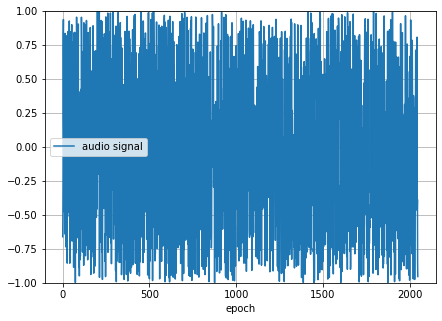

KeyboardInterrupt: 

In [74]:
%matplotlib inline
def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.ylim(-1, 1)
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();
    
data =  collections.defaultdict(list)
while(1):
    time.sleep(0.01)
    res,dataf = unpickleFile("data.pkl")
    if(res):
        data['audio signal'] = dataf[b'data']
        live_plot(data)
    
